* **I : Exploration**

In [1]:
 Data <- read.csv(file.path("..","data","training_data.csv")) # load the data
Data <- na.omit(Data) # suppress all NAs values
dim(Data)
head(Data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* Look at boxplot of pleansantness vs Intensity

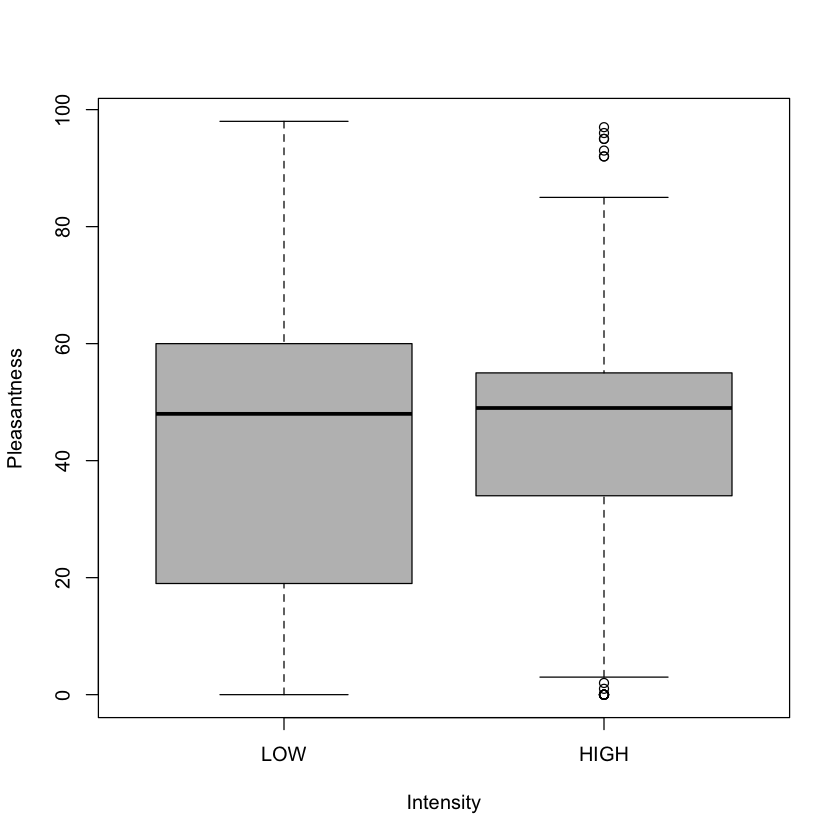

In [2]:
plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("LOW","HIGH"))


*INTERPRETATION* : 

We can see that the samples with high intensity are not considered very pleasant (pleasantness between 30 to 50). The samples that have a low intensity have a bigger range of pleasantness (20 to 60). Moreover, the mean pleasantness between intense and not intense smell is nearly the same (around 48). 

Change the Low, high Intensity value to binary value (low=0 and high =1)

In [3]:
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* let's look at somes data

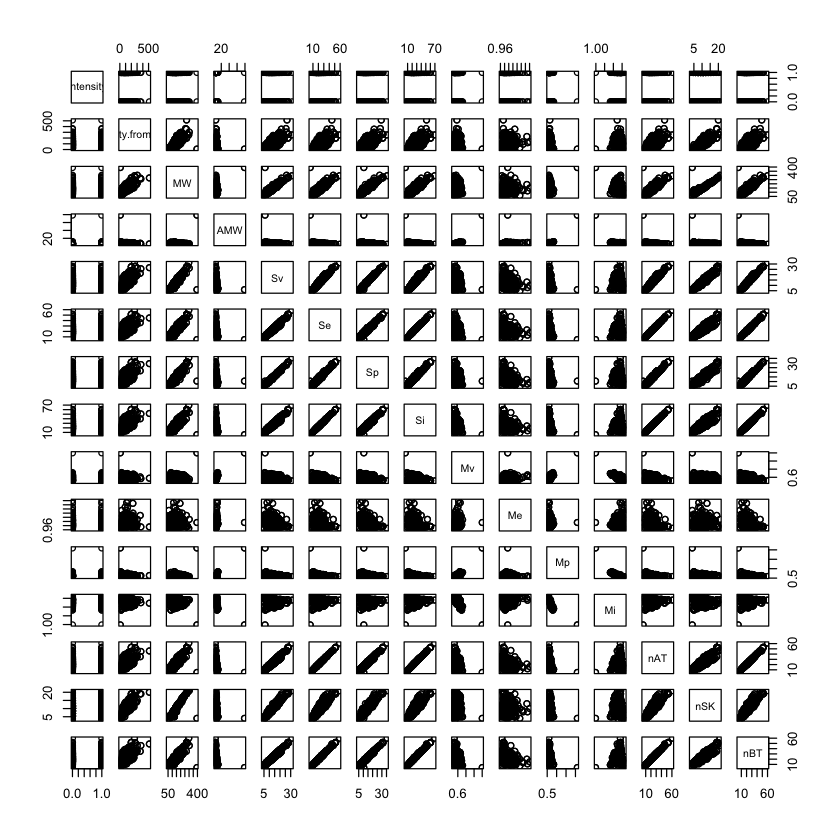

In [4]:
Data.x<-Data[, c(-2, -3)]
pairs(Data.x[, (1:15)] )

--> we can see some linear interaction bewteem SV, Se, Sp and Si, MW , nAT, nSK, nBTand Complexity from pubmed

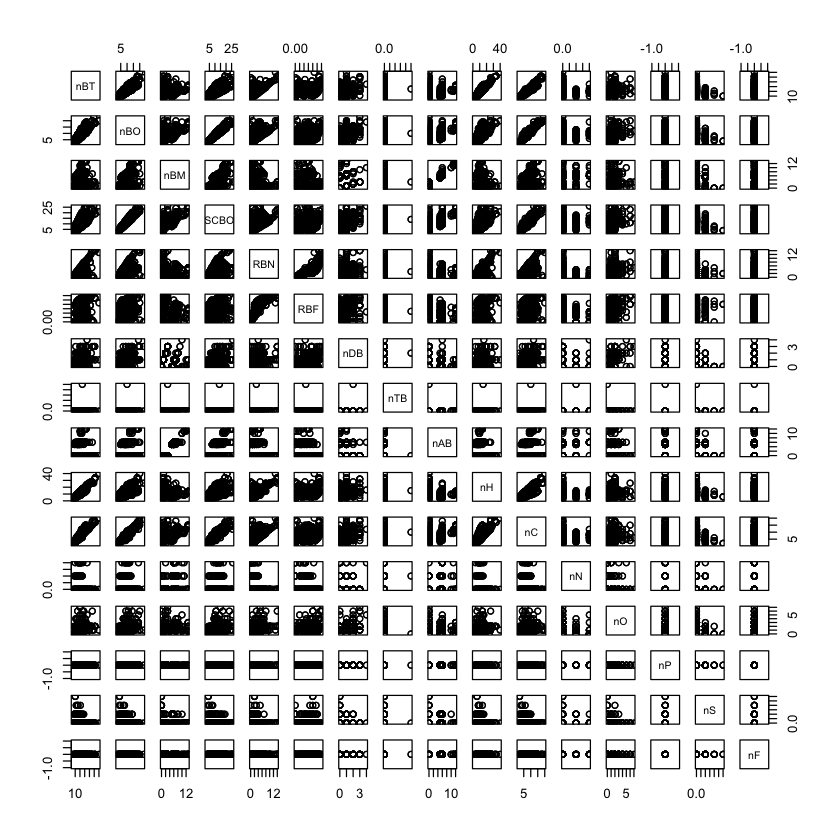

In [5]:
pairs(Data.x[, 15:30])

--> we can see some linear interaction bewteem nBT, nBO, SCBC, nH, nC. 

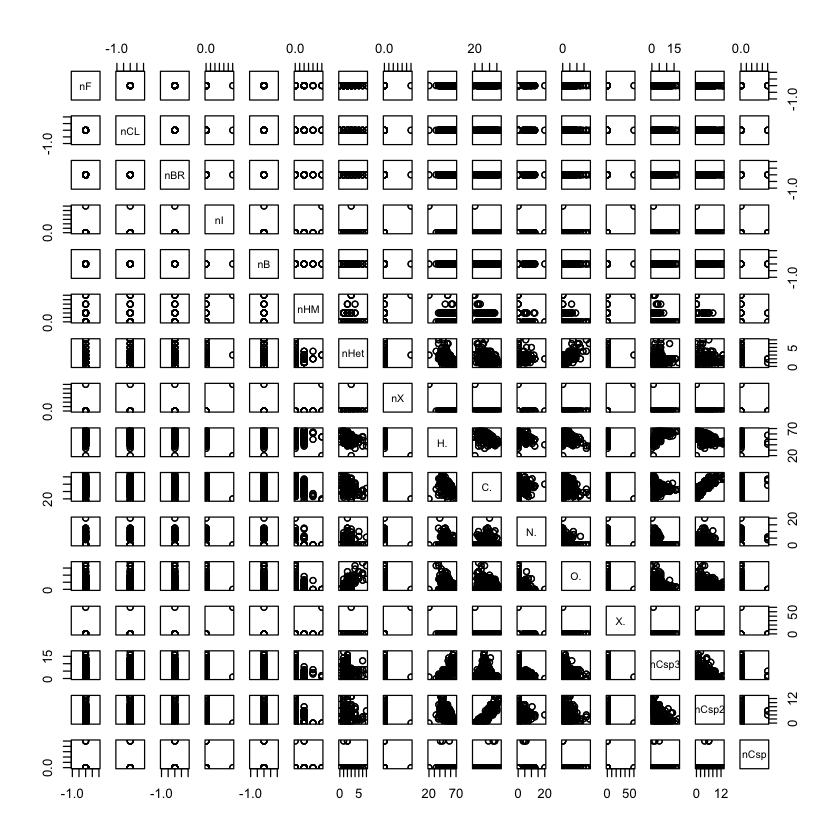

In [6]:
pairs(Data.x[, 30:45])

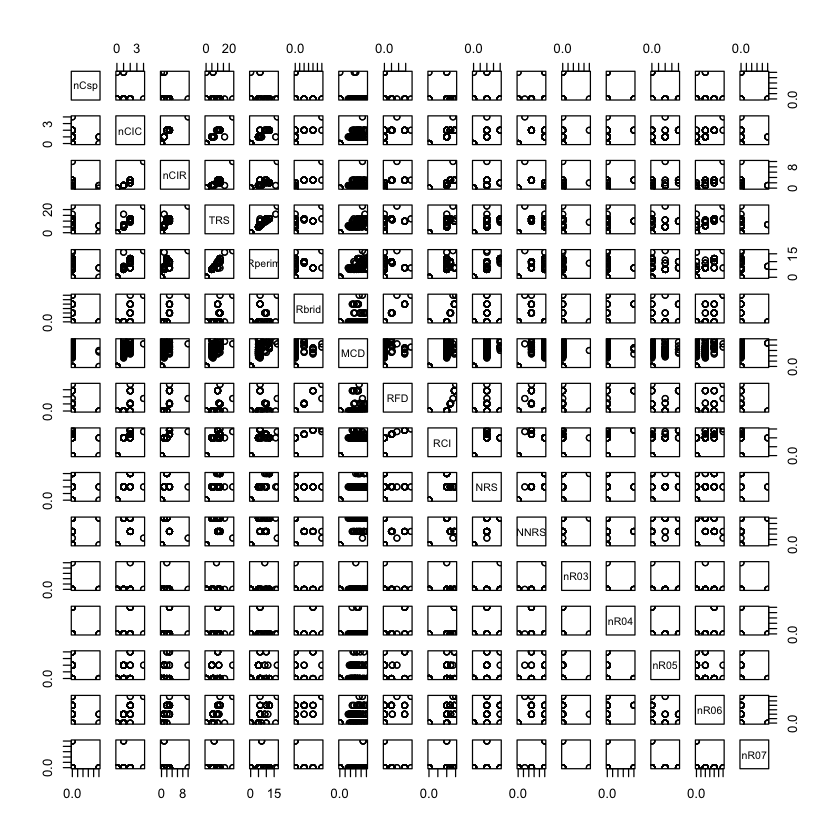

In [7]:
pairs(Data.x[, 45:60])

The visualization of 60 predictors of our data shows that we do not seem to have a lot of linear relashionships between the predictors. 
Lets clean our data in order to reduce the number of predictors.

Statistical analysis of the data : we supress the predictors with a null variance (do not have any effect on pleasantness)  and the correlated columns. 
We perform normalization of our data. 


In [30]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 

cormat<- cor(data[, -2])
highly_corr <- findCorrelation(cormat, 0.6) # find correlated columns 
data <- data[,-c(highly_corr)] # suppress correlated columns 
data_final<-data[, -3] # supress the SWEETORSOUR pedictor 
data_final<-as.data.frame(scale(data_final)) # normalization 

dim(data_final)
head(data_final)



[1] 708 170

,Intensity,VALENCE.PLEASANTNESS,D.Dtr04,SPI,Psi_i_0d,Psi_e_1d,X3A,Chi_X,SpPos_X,EE_Dz.m.,⋯,G.N..O.,DLS_01,DLS_02,DLS_07,LLS_01,Inflammat.50,Hypertens.80,Hypertens.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9992935,0.06138675,13.4151160,1.5006468,0.06107997,-0.06513652,-1.18027413,1.69229275,0.9893749,1.1136403,⋯,-0.2208591,0.2509462,2.0605327,0.1703781,-1.4035420,-0.05318703,4.1960309,-0.05318703,1.478546,-0.09238472
2,0.9992935,0.23351276,-0.1026619,-0.4406367,-0.19330014,-0.27142793,-0.23190997,-0.22290351,-0.3200832,-0.5649463,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
3,0.9992935,0.53473329,-0.1026619,0.7491957,0.06107997,-0.06934655,-0.73293255,2.51399230,2.3595760,1.6218886,⋯,-0.2208591,0.2509462,2.0605327,0.1703781,-1.4035420,-0.05318703,4.1960309,-0.05318703,1.478546,10.80901225
4,0.9992935,-1.57381039,-0.1026619,-0.6040868,1.88087618,-1.81229848,1.68271203,-1.31557741,-1.4642409,-0.8923696,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
5,-0.9992935,0.31957577,-0.1026619,-0.3287363,0.19805388,0.04011420,-0.32137828,0.04916791,0.1359866,-0.2924080,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
6,0.9992935,-0.97136934,-0.1026619,0.4298395,0.08064767,-0.06092649,-0.08876066,1.14869845,1.3677735,1.0479414,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,-0.3338889,-0.05318703,-0.2379838,-0.05318703,1.478546,-0.09238472


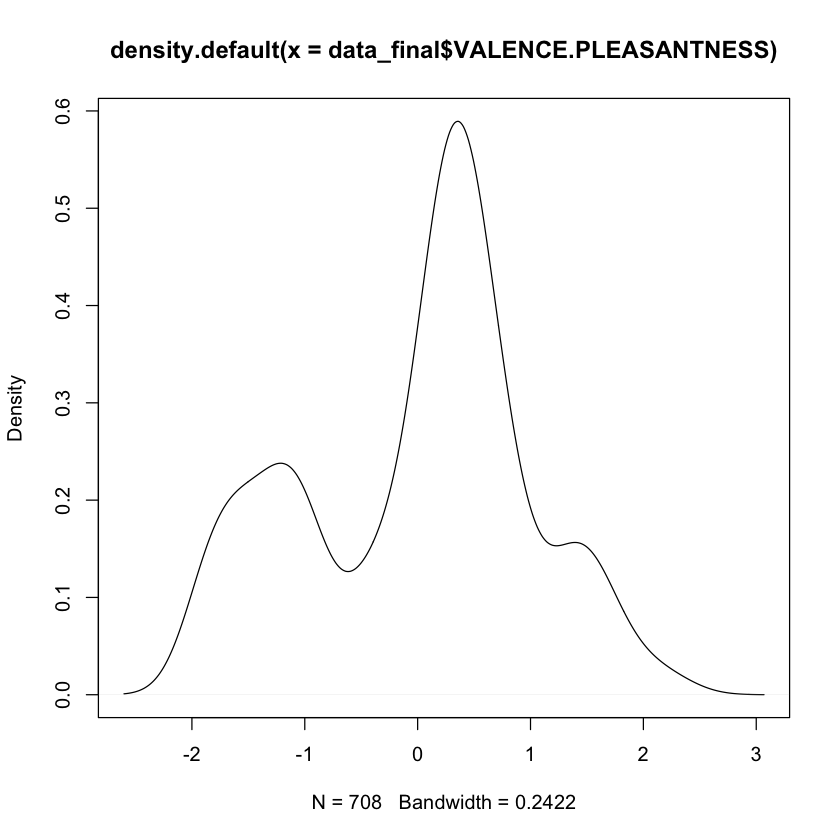

In [10]:
plot(density(data_final$VALENCE.PLEASANTNESS))


--> pleasantness does not have a Gaussian curve shape. It may be difficult to find a linear regression relashionship. 

* **II : LINEAR METHODE**

* divide the data between a training and a test set 

In [31]:
#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 


data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 


data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))


head(data.train)
head(data.test)

dim(data.train)

dim(data.test)

,pleasantness,Intensity,D.Dtr04,SPI,Psi_i_0d,Psi_e_1d,X3A,Chi_X,SpPos_X,EE_Dz.m.,⋯,G.N..O.,DLS_01,DLS_02,DLS_07,LLS_01,Inflammat.50,Hypertens.80,Hypertens.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
679,0.23351276,-0.9992935,-0.1026619,0.288601912,0.10021537,-0.1282870,0.6090922,0.32919302,0.871872229,1.1313912,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,-1.4035420,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
129,0.40563878,-0.9992935,-0.1026619,-0.460334559,0.43286629,-0.6798007,0.9311782,-0.76786913,-0.388792415,-0.2408385,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,-0.3338889,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
509,0.01835525,-0.9992935,-0.1026619,0.336379617,-0.01719083,-0.1282870,-0.4645276,0.32206212,0.252493549,-0.1068903,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,1.478546,-0.09238472
471,-0.02467626,-0.9992935,-0.1026619,-0.518170727,-0.21286785,-0.2672179,-0.4108466,-0.22125791,-0.399746057,-0.5699961,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
299,0.14744976,0.9992935,-0.1026619,0.008641329,0.21762158,0.0401142,-0.6613579,0.04779658,-0.224487781,-0.4311001,⋯,0.7612805,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
270,0.79292231,0.9992935,-0.1026619,0.062705573,0.21762158,0.0401142,-0.5182086,0.04669952,-0.008402293,-0.4509423,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472


,pleasantness,Intensity,D.Dtr04,SPI,Psi_i_0d,Psi_e_1d,X3A,Chi_X,SpPos_X,EE_Dz.m.,⋯,G.N..O.,DLS_01,DLS_02,DLS_07,LLS_01,Inflammat.50,Hypertens.80,Hypertens.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-1.5738104,0.9992935,-0.1026619,-0.6040868,1.88087618,-1.81229848,1.68271203,-1.31557741,-1.4642409,-0.8923696,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
5,0.3195758,-0.9992935,-0.1026619,-0.3287363,0.19805388,0.04011420,-0.32137828,0.04916791,0.1359866,-0.2924080,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,0.8026175,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
6,-0.9713693,0.9992935,-0.1026619,0.4298395,0.08064767,-0.06092649,-0.08876066,1.14869845,1.3677735,1.0479414,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,-0.3338889,-0.05318703,-0.2379838,-0.05318703,1.478546,-0.09238472
7,0.5347333,-0.9992935,-0.1026619,-2.1908095,0.04151227,-0.06092649,-0.58978324,1.15336097,0.8828259,0.1423371,⋯,-0.2208591,0.2509462,0.2760622,0.1703781,-0.3338889,-0.05318703,-0.2379838,-0.05318703,1.478546,-0.09238472
8,0.3626073,-0.9992935,-0.1026619,-0.4603346,0.35459549,-0.67980073,0.93117816,-0.76786913,-0.3887924,-0.2170685,⋯,-0.2208591,-3.9792896,-1.4034395,0.1703781,-1.4035420,-0.05318703,-0.2379838,-0.05318703,-0.675385,-0.09238472
9,0.4056388,-0.9992935,-0.1026619,4.0135864,0.06107997,-0.06934655,-1.28763612,2.49671358,1.9941227,1.1928054,⋯,10.8339306,0.2509462,2.0605327,0.1703781,-3.6765548,18.77502097,4.1960309,-0.05318703,1.478546,10.80901225


[1] 354 170

[1] 354 170

Run subset selection with foward regression method in order to reduce the number of predictors to perform multilinear regression 

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“23  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”


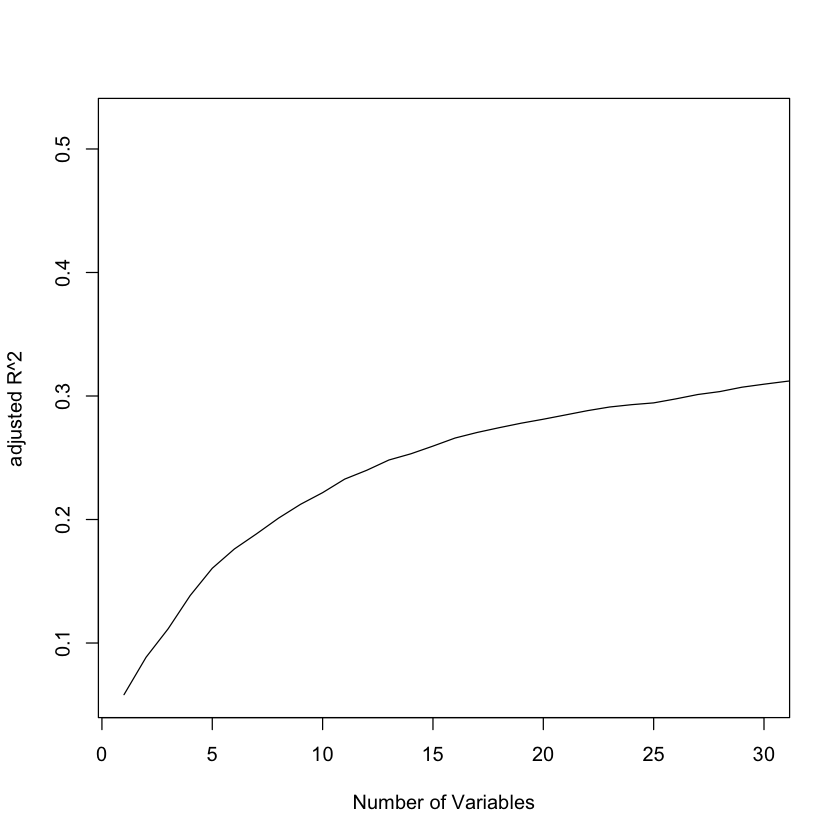

In [43]:
library(leaps)
regfit.fwd <- regsubsets(pleasantness~ ., data.train, method = "forward", nvmax = 350)
regfit.fwd.summary <- summary(regfit.fwd)

# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,30),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

The value of the adjuste R-squared is too low, we choose not to use the outcome of this regression. 

 Lets try to run multilinear regression with all predictors (the 845 predictors) : 

In [32]:
fit1<-lm(pleasantness~. , data.train)
summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(fit1, data.train)
quality.of.fit(fit1, data.test)






Call:
lm(formula = pleasantness ~ ., data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67888 -0.50043  0.02163  0.46970  1.93375 

Coefficients: (9 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.309817   0.394145   0.786  0.43280   
Intensity     -0.041626   0.056350  -0.739  0.46099   
D.Dtr04       -0.079291   0.123143  -0.644  0.52041   
SPI           -0.099793   0.670701  -0.149  0.88188   
Psi_i_0d      -0.242079   0.214852  -1.127  0.26126   
Psi_e_1d      -0.016288   0.187962  -0.087  0.93103   
X3A           -0.700713   0.359934  -1.947  0.05301 . 
Chi_X         -2.813783   3.995232  -0.704  0.48210   
SpPos_X        1.447812   1.727359   0.838  0.40297   
EE_Dz.m.      -0.978644   1.233126  -0.794  0.42839   
ChiA_Dz.v.    -0.507124   0.597424  -0.849  0.39702   
MATS8e        -0.119981   0.134254  -0.894  0.37260   
MATS2i        -0.631776   0.375799  -1.681  0.09435 . 
MATS3i       

Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”


Residual standard error:  0.937039955365518  R^2 =  0.546597318490104 


Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”


Residual standard error:  11.0923685487375  R^2 =  -63.5996771442123 


In [37]:
#build a submodel with only good variables 

fit2<- lm(pleasantness ~X3A +MATS2i  +MATS6i +GATS2m + JGI4+ SpMaxA_EA.dm. + Eig03_EA.dm.  + Eig08_EA.dm. +
          ASP + Mor20s + Mor25s+ E1i  + Di + R6i. + nROR + C.005 + C.008 + C.036+ C.038 + H.052 + N.067 + Infective.80, data.train)
summary(fit2)
quality.of.fit(fit2, data.train)
quality.of.fit(fit2, data.test)





Call:
lm(formula = pleasantness ~ X3A + MATS2i + MATS6i + GATS2m + 
    JGI4 + SpMaxA_EA.dm. + Eig03_EA.dm. + Eig08_EA.dm. + ASP + 
    Mor20s + Mor25s + E1i + Di + R6i. + nROR + C.005 + C.008 + 
    C.036 + C.038 + H.052 + N.067 + Infective.80, data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26422 -0.68557  0.07653  0.60226  2.21806 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.0078573  0.0505673  -0.155 0.876613    
X3A           -0.2565297  0.0671875  -3.818 0.000161 ***
MATS2i         0.1991868  0.0786172   2.534 0.011750 *  
MATS6i         0.1152192  0.0610179   1.888 0.059862 .  
GATS2m        -0.0625343  0.0691432  -0.904 0.366432    
JGI4          -0.0232439  0.0623572  -0.373 0.709570    
SpMaxA_EA.dm. -0.0497696  0.0683133  -0.729 0.466792    
Eig03_EA.dm.  -0.0222922  0.0532155  -0.419 0.675557    
Eig08_EA.dm.  -0.1015352  0.0586580  -1.731 0.084389 .  
ASP            0.1822890  0.0745731   2.444 0

Residual standard error:  0.935857068652642  R^2 =  0.186425953563279 
Residual standard error:  1.01738034510597  R^2 =  0.0224057846274308 


--> l'algorithme ne converge pas.

Lets try lassos regularization (L1 and L2)  and PCA to find the best predictors to perform multilinear regression :

Loading required package: Matrix

Loaded glmnet 4.0-2



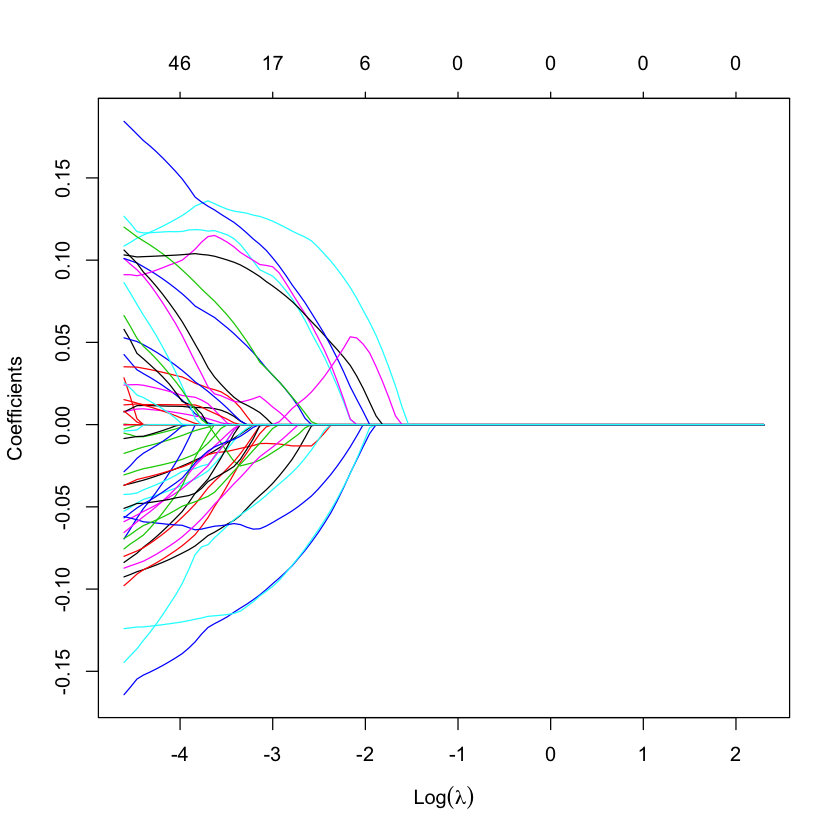

In [19]:
#L1 Regularization

library(glmnet)
grid =10^seq(1, -2, length = 100)

x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

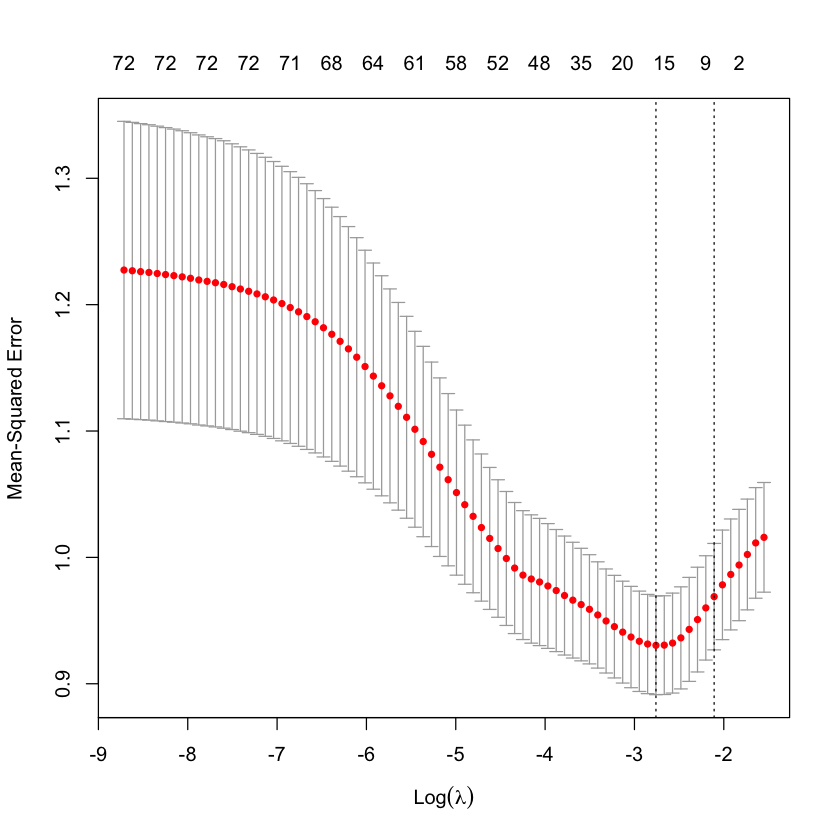

In [20]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [21]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
lasso_pred1=predict(lasso.mod, s=bestlam, newx = x.train)
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred1- data.train.y)^2)
mean((lasso_pred-data.test.y)^2)

[1] 0.8395087

[1] 0.9082324

**INTERPRETATION :**


The resitual standard error is a little bit smaller than with multilinear regression on submodels, but is still quite high. 

In [25]:
#LASSO L2-REGULARIZATION 

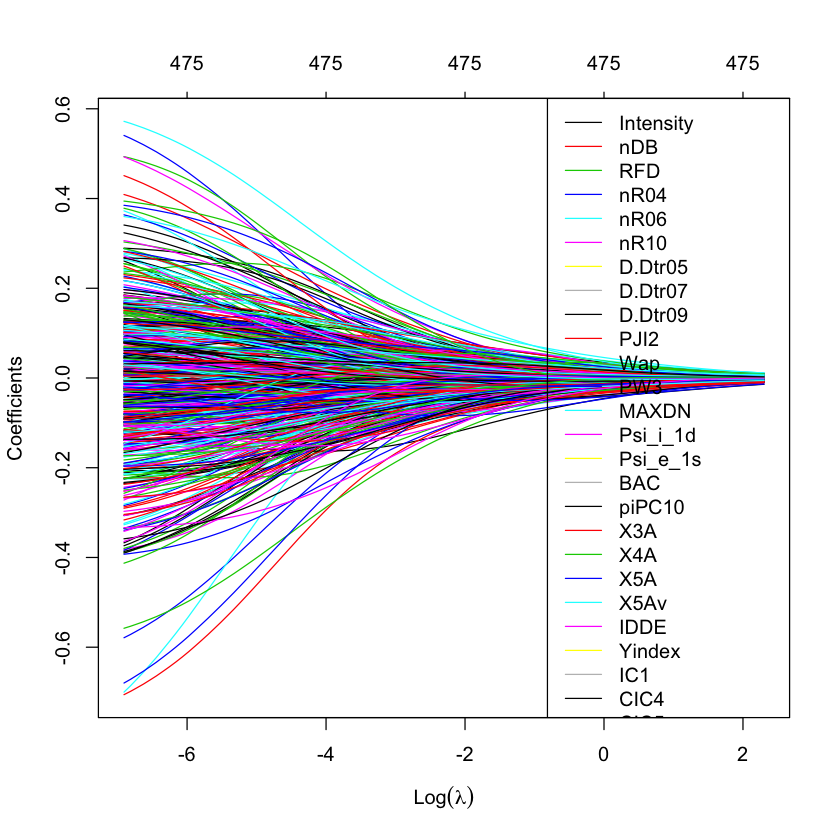

In [20]:
ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -3, length = 100))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

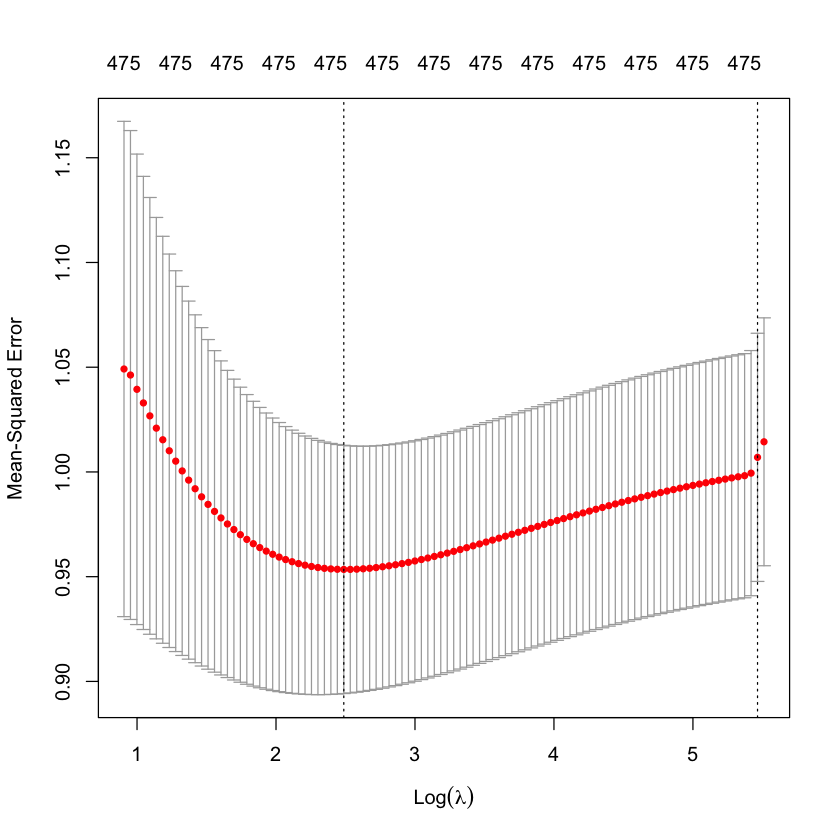

In [21]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 50)
plot(cv.lasso2)


In [22]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [23]:
ridge_pred1 = predict(ridge.mod,  s = bestlam, newx = x.train)
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred1-data.train.y)^2)
mean((ridge_pred-data.test.y)^2)


[1] 0.374751

[1] 1.016565

The MSE of the training set is much lower than the one found with L1-regularization. However, the MSE of the test set is a higher. This method is probably too flexible. 

Let's perfom PCA :

In [22]:
prin_comp <- prcomp(data.train.x, scale. = T, center =T)
summary(prin_comp)


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.62354 2.25588 2.24349 1.89898 1.84951 1.77994 1.74657
Proportion of Variance 0.08939 0.06609 0.06537 0.04683 0.04442 0.04115 0.03962
Cumulative Proportion  0.08939 0.15548 0.22085 0.26768 0.31210 0.35325 0.39287
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.66062 1.55051 1.50635 1.44275 1.40014 1.36459 1.32814
Proportion of Variance 0.03581 0.03122 0.02947 0.02703 0.02546 0.02418 0.02291
Cumulative Proportion  0.42868 0.45990 0.48937 0.51640 0.54186 0.56605 0.58896
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     1.25961 1.23630 1.22137 1.1707 1.15560 1.12863 1.09185
Proportion of Variance 0.02061 0.01985 0.01937 0.0178 0.01734 0.01654 0.01548
Cumulative Proportion  0.60956 0.62941 0.64878 0.6666 0.68393 0.70047 0.71595
                          PC22

In [23]:
dim(prin_comp$rotation)
norm(prin_comp$rotation[,1], "2") # use the standard Euclidean 2-norm

[1] 77 77

[1] 1

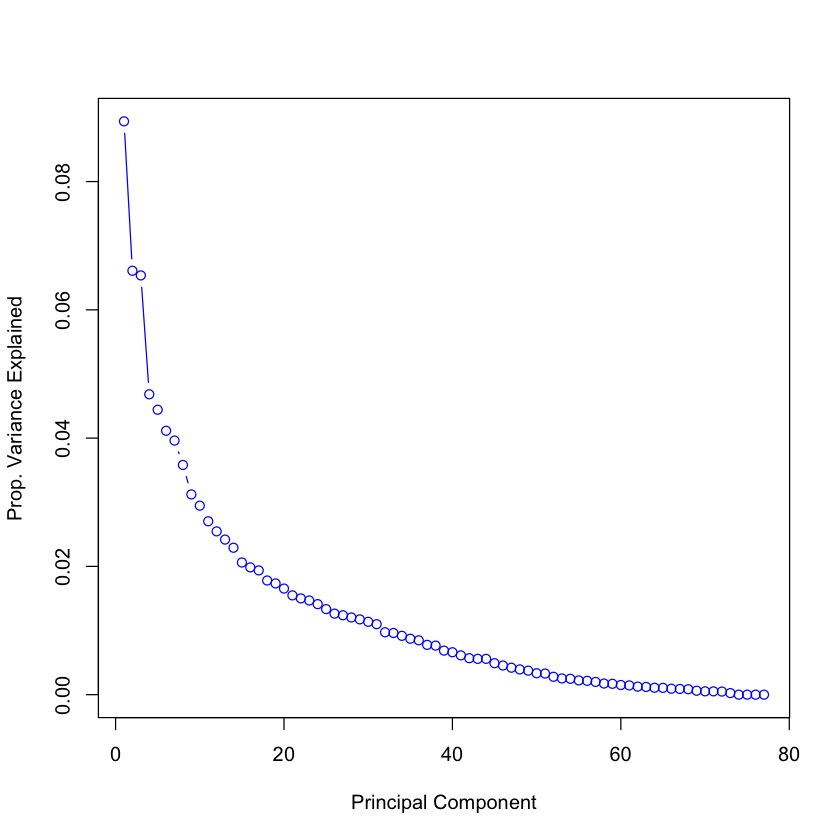

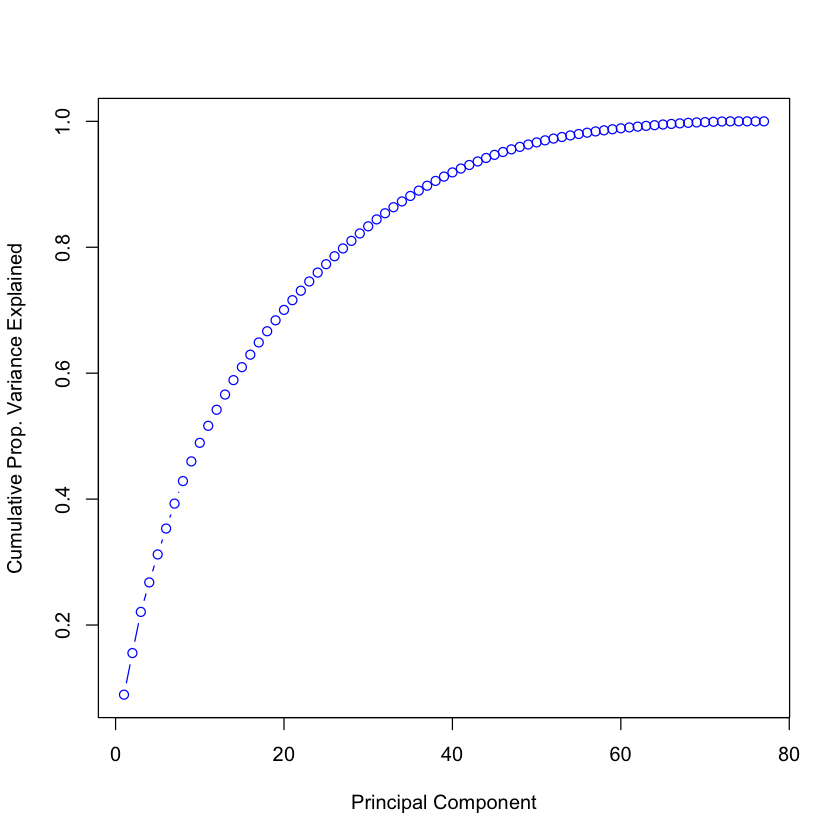

In [24]:
pca.var <- prin_comp$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

--> prenons les 50 premiers componentes

In [26]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 50 PCAs

train.data <- train.data[,1:40]

linearmod<-lm(pleasantness ~., train.data)

#transform test into PCA

test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 60 components
test.data <- test.data[,1:40]


rpart.prediction <- predict(linearmod, test.data)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart.prediction )^2)




Residual standard error:  0.936543146032163  R^2 =  0.2270787101669 
Residual standard error:  1.03902163086101  R^2 =  0.032741023026294 


[1] 1.211091

Lasso L1 regularization gives us the best result. 

Overall, the MSE of the linear methods we tested is very high.Those methods do not predict the pleasantness efficiently. 

ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): l'argument est de longueur nulle


* III : NON LINEAR METHOD (TREE)

In [26]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 

cormat<- cor(data)
highly_corr <- findCorrelation(cormat, 0.9) # find correlated columns 
data <- data[,-c(highly_corr)] # suppress correlated columns 
data_final<-data[, -3] # supress the SWEETORSOUR pedictor 
data_final<-as.data.frame(scale(data_final)) # normalization 


#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 


data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 


data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))



Perform descision tree on our data : 

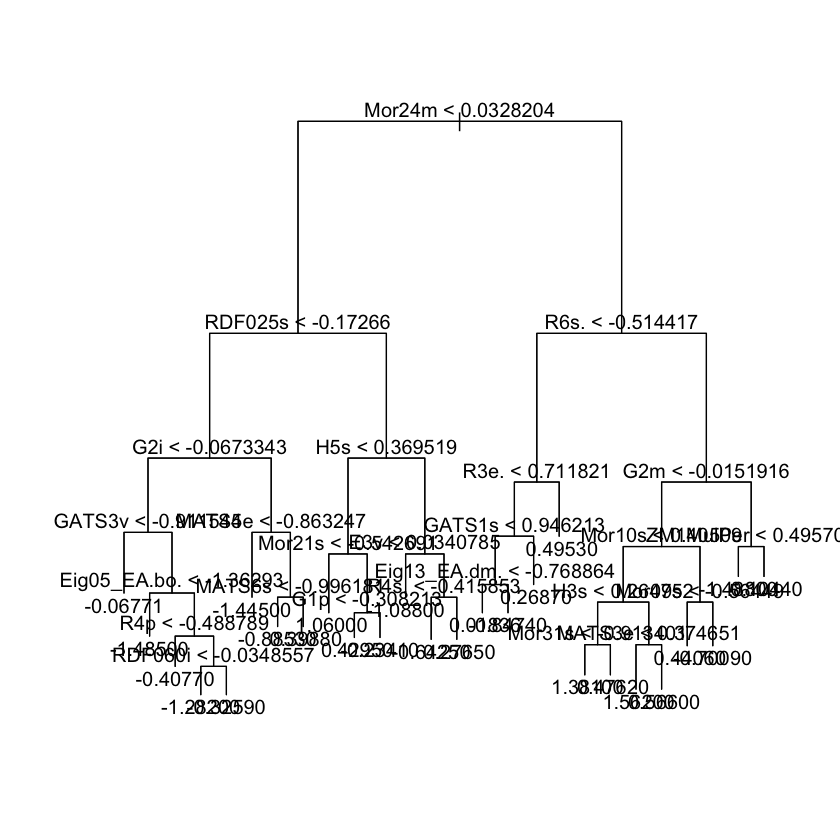

In [34]:
#DESCISION TREES 

library(tree)
p_tree <- tree(data.train$pleasantness ~ ., data.train, minsize = 1)
plot(p_tree)
text(p_tree)


In [35]:

mean((data.test[,'pleasantness']) - predict(p_tree, data.test))^2

[1] 0.0004339606

Use prunned tree to find the optimal size of tree to predict our data : 

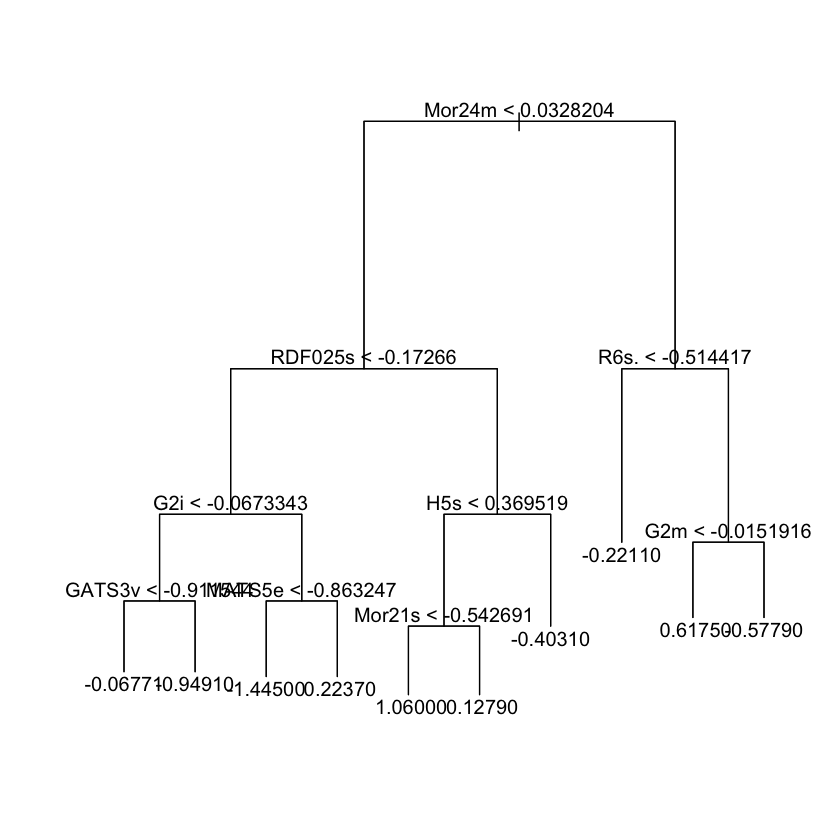

In [48]:
# prunned tree example of size 10 
prunned_p_tree <- prune.tree(p_tree, best = 10)
plot(prunned_p_tree)
text(prunned_p_tree)

In [43]:
dim(data)

mean((data.test[,'pleasantness']) - predict(prunned_p_tree, data.test))^2

[1] 708 852

[1] 0.0003319308

In the following we define some functions to fit the data and run 6-fold cross-validation. We run 6-fold cross-validation,
because our training data has size 426, which is a multiple of 6.

In [34]:
# find the optimal tree size
p.train <- function(train) {
    tree(data.y ~ ., data, subset = train)
}

p.evaluate <- function(tree, set) {
    sapply(2:100, function(i) mean((data[set,'data.y']) - predict(prune.tree(tree, best = i), data[set,]))^2) # We compute the mean squared error for all trees with 2 to 100 leaf nodes.
}
p.cv <- function(train) {
    res <- sapply(1:6, function(v) {
                            idx.test <- seq((v-1)*71 + 1, v*71) # fold index : divide into 6 cross-fold 
                            this.fold.test <- train[idx.test]   # validation
                            this.fold.train <- train[-idx.test] # training
                            tree <- p.train(this.fold.train)
                            p.evaluate(tree, this.fold.test)
                        })
    rowMeans(data.frame(res))
}
           
p.train.and.evaluate <- function() { # method to evaluate the model of training, test and using cross-validation
    train <- sample(nrow(data), 426)
    tree <- p.train(train)
    list(train = p.evaluate(tree, train),
         test = p.evaluate(tree, -train),
         cv = p.cv(train),
         tree = tree)
}
set.seed(1)
res <- replicate(3, p.train.and.evaluate())# we run everything for 3 different training sets
           


Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”Warning message in prune.tree(tree, best = i):
“best is bigger t

Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arro

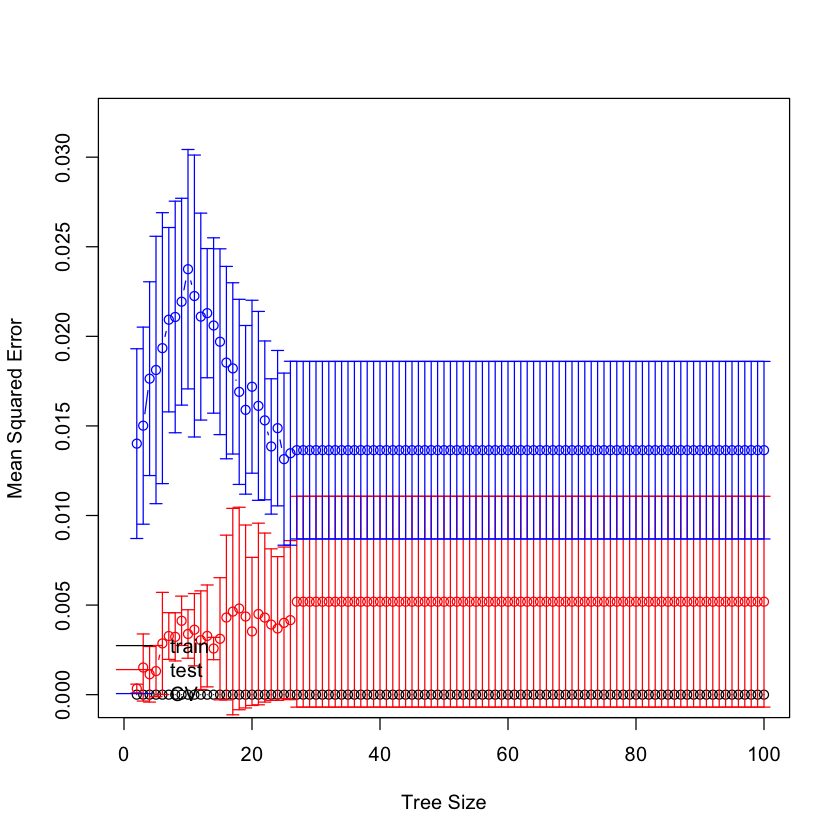

In [47]:

std.plot <- function(data, x = 2:100, ...) {
    df <- data.frame(data)
    m <- rowMeans(df)
    std <- sqrt(rowMeans((df - m)^2))
    points(x, m, type = "b", ...)
    arrows(x, m - std, x, m + std, length=0.05, angle = 90,  code=3, ...)
}
plot(c(),ylim = c(0,0.032), xlim = c(0, 100), xlab = "Tree Size", ylab = "Mean Squared Error")
std.plot(res[1,])
std.plot(res[2,], col = "red")
std.plot(res[3,], col = "blue")
legend("bottomleft", c("train", "test", "CV"), bty = 'n',
                     col = c("black", "red", "blue"), lty = 1)


We can deduce from the plot above that the optimal tree size is around 22.

lets plot this tree. 

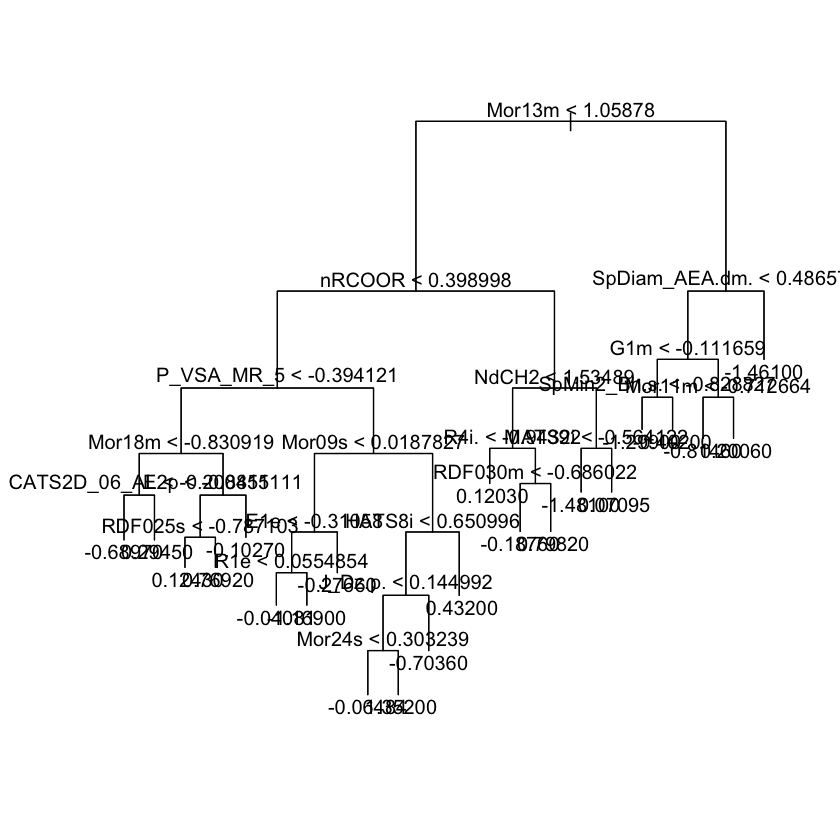

In [66]:
final.tree <- prune.tree(p_tree, best = 22)
plot(final.tree)
text(final.tree)


In [67]:
# Mean MSE for training set 
df <- data.frame(res[1,])
m <- rowMeans(df)
mean(m)

# Mean MSE for test set 
df <- data.frame(res[2,])
m <- rowMeans(df)
mean(m)

# Mean MSE for CV set 
df <- data.frame(res[3,])
m <- rowMeans(df)
mean(m)

[1] 8.943414e-34

[1] 0.004717113

[1] 0.01474789

The MSE found for training set is very low. The one for the test set is low but a lot hight than the MSe for training set. This method is maybe still a little bit too flexible. The MSE for tge cross validation set is the highest. However, regarding those MSE values, this method is quite efficient to predict valence pleasantness. 

In [ ]:
#Bangging and random forest

In [17]:
library(xgboost)
library(Matrix)
plea.train.x <- sparse.model.matrix( pleasantness~ . -1, data = data.train)
plea.test.x = sparse.model.matrix(pleasantness ~ . -1, data = data.test)
plea.train.y =data.train.y
plea.test.y =data.test.y

In [ ]:
#testons pour des valeur differentes de eta pour boosting. 

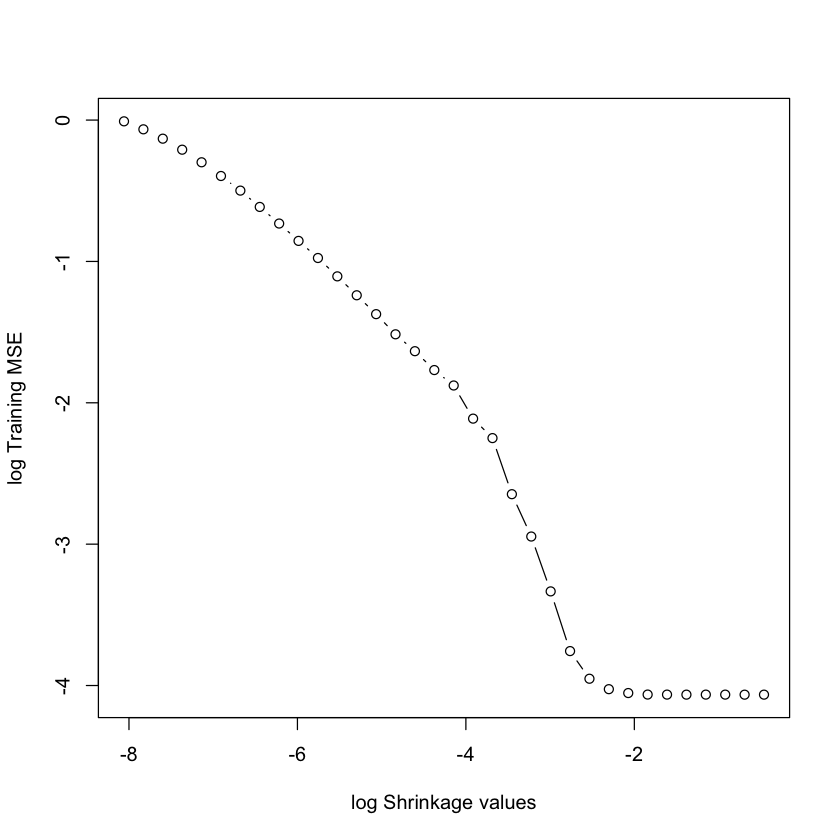

In [18]:
set.seed(1)
pows <- seq(-3.5, -0.2, by = 0.1)
lambdas <- 10^pows

for (i in 1:length(lambdas)) {
  boost.pleas <- xgboost(plea.train.x,
                           label=plea.train.y,
                           eta=lambdas[i],
                           objective="reg:squarederror",
                           max.depth=3,
                           nrounds=1000,
                           verbose = 0)
  pred.train <- predict(boost.pleas, plea.train.x)
  pred.test <- predict(boost.pleas, plea.test.x)
  train.err[i] <- mean((pred.train - plea.train.y)^2)
  test.err[i] <- mean((pred.test - plea.test.y)^2)
}
plot(log(lambdas), log(train.err), type="b", xlab="log Shrinkage values", ylab="log Training MSE")

In [19]:
min(train.err)
lambdas[which.min(train.err)]

[1] 0.017168

[1] 0.5011872

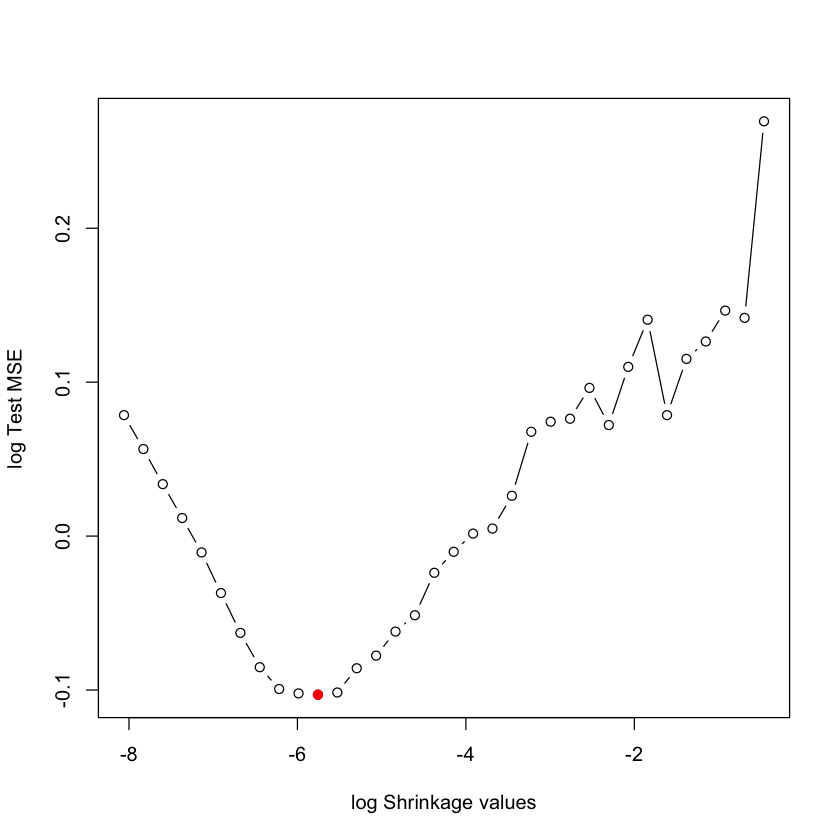

In [20]:
plot(log(lambdas), log(test.err), type="b", xlab="log Shrinkage values", ylab="log Test MSE")
points(log(lambdas[which.min(test.err)]), log(min(test.err)), col="red", pch=19)

In [21]:
min(test.err)
lambdas[which.min(test.err)]

[1] 0.9021147

[1] 0.003162278

-->  The optimal shrinkage is  λ≈0.003

In [22]:
boost.pleas = xgboost(plea.train.x, label = plea.train.y,
                      objective = "reg:linear",
                      eta = 0.003,
                      max_depth = 4,
                      nround = 10000)

[1]	train-rmse:1.126945 
[2]	train-rmse:1.125067 
[3]	train-rmse:1.123196 
[4]	train-rmse:1.121333 
[5]	train-rmse:1.119478 
[6]	train-rmse:1.117629 
[7]	train-rmse:1.115789 
[8]	train-rmse:1.113941 
[9]	train-rmse:1.112115 
[10]	train-rmse:1.110296 
[11]	train-rmse:1.108484 
[12]	train-rmse:1.106665 
[13]	train-rmse:1.104866 
[14]	train-rmse:1.103076 
[15]	train-rmse:1.101292 
[16]	train-rmse:1.099500 
[17]	train-rmse:1.097729 
[18]	train-rmse:1.095965 
[19]	train-rmse:1.094208 
[20]	train-rmse:1.092458 
[21]	train-rmse:1.090714 
[22]	train-rmse:1.088962 
[23]	train-rmse:1.087232 
[24]	train-rmse:1.085508 
[25]	train-rmse:1.083775 
[26]	train-rmse:1.082065 
[27]	train-rmse:1.080364 
[28]	train-rmse:1.078666 
[29]	train-rmse:1.076975 
[30]	train-rmse:1.075294 
[31]	train-rmse:1.073599 
[32]	train-rmse:1.071929 
[33]	train-rmse:1.070264 
[34]	train-rmse:1.068607 
[35]	train-rmse:1.066962 
[36]	train-rmse:1.065323 
[37]	train-rmse:1.063666 
[38]	train-rmse:1.062040 
[39]	train-rmse:1.060

In [23]:
yhat.boost = predict(boost.pleas, plea.test.x)
(mean(yhat.boost -  plea.test.y)^2)



[1] 6.097654e-05

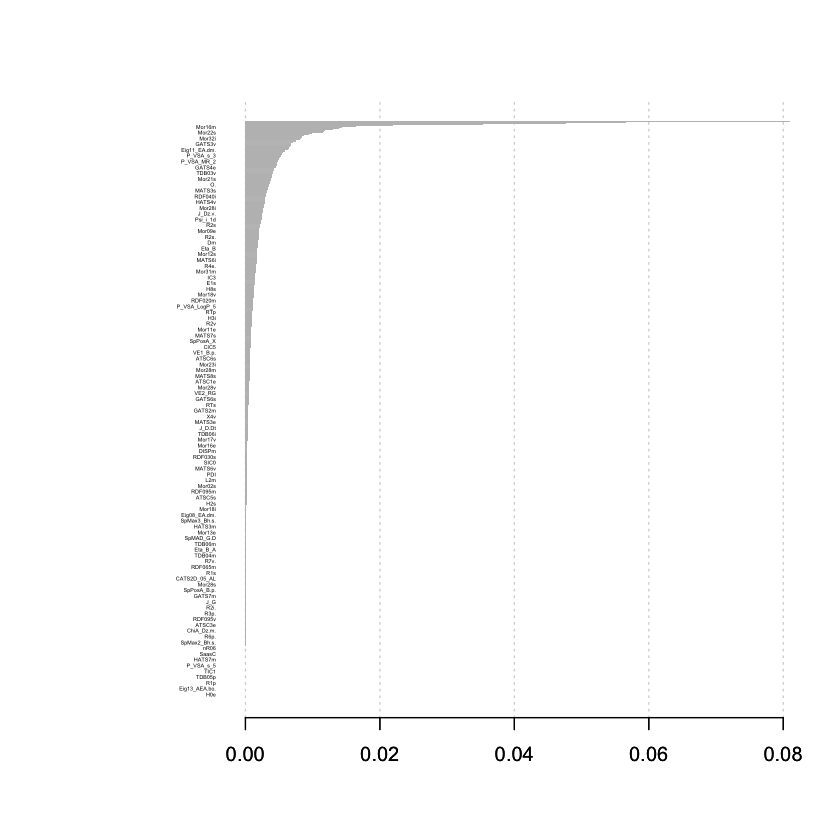

In [35]:
xgb.plot.importance(xgb.importance(model = boost.pleas))

In [25]:
#Random forst
#By default, randomForest() uses p/3 variables when building a random forest of regression trees
library(randomForest)
set.seed(1)

m <- 844 
bag.pleas <- randomForest(pleasantness ~ ., data = data.train, mtry = m/3, ntree = 10000)
pred.bag <- predict(bag.pleas, newdata = data.test)
mean((pred.bag - data.test.y)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 0.8916383

--> error is larger than the one with boosting : bossting give us the best model. 